# Learning Scikit-Learn

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../../data/smsspamcollection.tsv', sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


We are going to use the `length` and `punct` for now

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

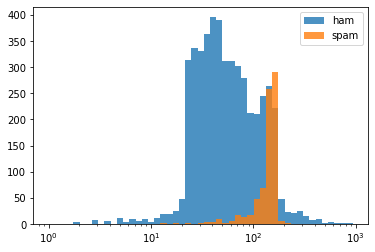

In [9]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

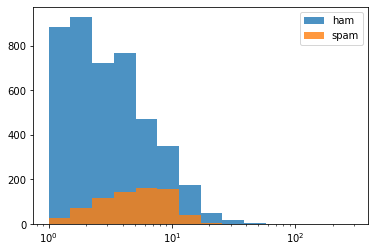

In [10]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:

X = df[['length','punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [13]:
X_train.shape

(3900, 2)

In [14]:
X_test.shape

(1672, 2)

In [15]:
y_test.shape

(1672,)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr_model = LogisticRegression(solver='lbfgs')

In [18]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [19]:
from sklearn import metrics

In [20]:
predictions = lr_model.predict(X_test)

In [21]:
metrics.confusion_matrix(y_test, predictions)

array([[1404,   44],
       [ 219,    5]])

In [22]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [23]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [24]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [25]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



### Try another ML Model

It's easy to use a different model

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print(metrics.classification_report(y_test, nb_predictions))
print(metrics.confusion_matrix(y_test, nb_predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672

[[1438   10]
 [ 224    0]]


On this model you will notice that we detected NONE of the `spam` at all. 

```
        spam       0.00      0.00      0.00       224
```

### And even another

This is how it goes sometimes, to find a good starting model.

In [27]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
print(metrics.classification_report(y_test, svc_predictions))
print(metrics.confusion_matrix(y_test, svc_predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

[[1373   75]
 [ 121  103]]


# Feature Extraction from Text

In [28]:
df = pd.read_csv(get_data_url('smsspamcollection.tsv'), sep='\t')
df.head()

NameError: name 'get_data_url' is not defined

In [ ]:
df.isnull().sum()

Out[29]: label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df['label'].value_counts()

Out[30]: ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Scikit-learn's CountVectorizer
Text preprocessing, tokenizing and the ability to filter out stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

Out[32]: (3733, 7082)

This shows that our training set is comprised of 3733 documents, and 7082 features.

## Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

Out[33]: (3733, 7082)

Note: the fit_transform() method actually performs two operations: it fits an estimator to the data and then transforms our count-matrix to a tf-idf representation.

## Combine Steps with TfidVectorizer
In the future, we can combine the CountVectorizer and TfidTransformer steps into one using TfidVectorizer:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

Out[34]: (3733, 7082)

## Train a Classifier
Here we'll introduce an SVM classifier that's similar to SVC, called LinearSVC. LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

Out[35]: LinearSVC()

Earlier we named our SVC classifier **svc_model**. Here we're using the more generic name **clf** (for classifier).

## Build a Pipeline
Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set we'll have to submit it to the same procedures. Fortunately scikit-learn offers a Pipeline class that behaves like a compound classifier.

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Out[36]: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Test the classifier and display results

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


Using the text of the messages, our model performed exceedingly well; it correctly predicted spam 98.97% of the time!
Now let's apply what we've learned to a text classification project involving positive and negative movie reviews.

## Predict a few samples

Now that we have a trained model that performs well enough we can use it to predict new documents (messages).

In [ ]:
text_clf.predict(["Hi how are you doing?"])

Out[41]: array(['ham'], dtype=object)

In [ ]:
text_clf.predict(["Dear Sir. Your car insurance is expired. Text HELP to 33434 to get in contact with one of representatives to resolve this issue."])

Out[42]: array(['ham'], dtype=object)

# Project: Movie Reviews

## Read our file

In [ ]:
df = pd.read_csv(get_data_url('moviereviews.tsv'), sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [ ]:
len(df)

Out[44]: 2000

In [ ]:
# print(df['review'][0])

In [ ]:
df.isnull().sum()

Out[46]: label      0
review    35
dtype: int64

## Drop empty reviews

In [ ]:
# drop empty reviews
df.dropna(inplace=True)
df.isnull().sum()

Out[47]: label     0
review    0
dtype: int64

In [ ]:
blanks = []
# index, label, review_text
for i,lb,rb in df.itertuples():
  if rb.isspace():
    blanks.append(i)

print(blanks)

[57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [ ]:
df.drop(blanks, inplace=True)
len(df)

Out[49]: 1938

## Train a model

In [ ]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

We can use a `Pipeline` here to simplify things

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC())])
text_clf.fit(X_train, y_train)

Out[52]: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Run Predictions on known (test) reivews

This will tell us how our model is doing

In [ ]:
predictions = text_clf.predict(X_test)

And here we can print out a few metrics to see if we like the model or not.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[235  47]
 [ 41 259]]
              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582

0.8487972508591065


# Assessment Project

In [ ]:
df = pd.read_csv(get_data_url('moviereviews2.tsv'), sep='\t')
df.isnull().sum()

Out[55]: label      0
review    20
dtype: int64

In [ ]:
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [ ]:
df.dropna(inplace=True)

empty_indexes = []
for i,lb,rb in df.itertuples():
  if rb.isspace():
    empty_indexes.append(i)

df.drop(empty_indexes, inplace=True)

In [ ]:
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])
text_clf.fit(X_train,y_train)

Out[59]: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[821  78]
 [ 58 837]]
              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       899
         pos       0.91      0.94      0.92       895

    accuracy                           0.92      1794
   macro avg       0.92      0.92      0.92      1794
weighted avg       0.92      0.92      0.92      1794

0.9241917502787068


In [ ]:
text_clf.predict(["This was a really great movie!"])

Out[62]: array(['pos'], dtype=object)

In [ ]:
text_clf.predict(["The director should quite and get another job."])

Out[63]: array(['neg'], dtype=object)